In [8]:
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import hypertools as hyp
import time, glob, itertools
import geoplot as gplt

from scipy import spatial

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [9]:
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\probability maps\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed)

In [10]:
huc12=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12= huc12.to_crs({'init': 'epsg:3732'})


In [11]:
len(huc12.HUC_12.unique())

2382

In [12]:
frame['HUC_12']=frame.HUC_12.astype(str)

In [13]:
CaptainHucstable = huc12.merge(frame, on='HUC_12' )

In [14]:
inHouse=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\inhouse_elemental.csv')
inHouse

,Publication,Sample_ID,Old_Sample_ID,WyoDoG,WyoDoG_Name,Sample_Desc,latitude,longitude,ag_ppm,al_pct,...,ti_pct,ti_ppm,tm_ppm,u_ppm,v_ppm,w_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm
0,REE_RI-65,20110921WS-B,NaN,NaN,Union Pass - Warm Spring Area (Northwest Fremo...,NaN,43.4843,-109.8640,1.63,4.07,...,0.03,300.0,NaN,54.90,319.0,9.9,323.0,NaN,170.0,500.0
1,Iron_RI-67,20141015WS-D,NaN,X,Grass Creek north,Cretaceous Mesaverde Fm paleoplacer; Grass Cr...,43.9582,-108.6295,0.50,NaN,...,0.07,700.0,5.29,102.00,931.0,NaN,292.0,39.20,277.0,10000.0
2,REE_RI-71,WGS-0501,NaN,NaN,"Southeast Pine Mountain, Natrona County",NaN,42.9534,-106.9520,0.50,NaN,...,0.02,200.0,1.61,26.20,2500.0,5.0,102.5,12.55,1065.0,10000.0
3,REE_RI-71,20150929LC-2,NaN,NaN,Wilkins Peak Member,NaN,41.0059,-109.2228,1.30,NaN,...,0.12,1200.0,4.46,64.10,1200.0,8.0,182.0,32.20,470.0,10000.0
4,OtherSamples,20110921WS-B,NaN,NaN,South Fork of Warm Springs Creek - 2 heaping p...,South Fork of Warm Springs Creek - 2 heaping p...,43.4843,-109.8645,1.63,4.07,...,0.03,300.0,6.35,92.20,357.0,20.0,610.0,44.40,170.0,10000.0
5,REE_RI-65,WMS-GC1-2010,NaN,NaN,Mesaverde-Grass Creek South,NaN,43.9137,-108.6082,0.01,0.43,...,0.10,1000.0,6.93,135.00,768.0,5.6,331.0,50.90,306.0,10000.0
6,OtherSamples,K-PV1,NaN,NaN,"Kirwin area, Pickwick Vein","Kirwin area, Pickwick Vein",43.8605,-109.2948,154.00,0.49,...,0.09,900.0,0.02,8.46,26.0,19.0,0.5,0.09,141.0,2.0
7,REE_RI-65,20120730BG-2,NaN,NaN,Skunk Hollow,NaN,42.7384,-106.3162,0.50,NaN,...,3.40,34000.0,0.02,0.17,5.0,1.0,0.8,0.15,2.0,2.0
8,REE_RI-65,20120927JC-G.1,NaN,NaN,"Island City Group, Sierra Madre",NaN,41.2051,-107.0557,0.50,NaN,...,0.50,5000.0,0.89,0.13,97.0,1.0,56.0,6.18,34.0,2.0
9,REE_RI-65,20121009WS-F,NaN,NaN,20121009WS-F,NaN,42.6121,-107.7880,0.50,NaN,...,0.50,5000.0,0.05,6.47,46.0,3.0,3.3,0.24,429.0,2.0


In [15]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(inHouse.longitude, inHouse.latitude)]
crs = {'init': 'epsg:3732'} 
geo_df = GeoDataFrame(inHouse, crs={'init': 'epsg:4326'}, geometry=geometry)
#geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')
projGeoDF=geo_df.to_crs(crs)

In [9]:
projGeoDF

,Publication,Sample_ID,Old_Sample_ID,WyoDoG,WyoDoG_Name,Sample_Desc,latitude,longitude,ag_ppm,al_pct,...,ti_ppm,tm_ppm,u_ppm,v_ppm,w_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm,geometry
0,REE_RI-65,20110921WS-B,NaN,NaN,Union Pass - Warm Spring Area (Northwest Fremo...,NaN,43.4843,-109.8640,1.63,4.07,...,300.0,NaN,54.90,319.0,9.9,323.0,NaN,170.0,500.0,POINT (1672848.886618817 1089426.332283185)
1,Iron_RI-67,20141015WS-D,NaN,X,Grass Creek north,Cretaceous Mesaverde Fm paleoplacer; Grass Cr...,43.9582,-108.6295,0.50,NaN,...,700.0,5.29,102.00,931.0,NaN,292.0,39.20,277.0,10000.0,POINT (2000229.020699002 1260208.092358341)
2,REE_RI-71,WGS-0501,NaN,NaN,"Southeast Pine Mountain, Natrona County",NaN,42.9534,-106.9520,0.50,NaN,...,200.0,1.61,26.20,2500.0,5.0,102.5,12.55,1065.0,10000.0,POINT (2449844.17697752 899099.4886117913)
3,REE_RI-71,20150929LC-2,NaN,NaN,Wilkins Peak Member,NaN,41.0059,-109.2228,1.30,NaN,...,1200.0,4.46,64.10,1200.0,8.0,182.0,32.20,470.0,10000.0,POINT (1838010.937273353 184658.1673067195)
4,OtherSamples,20110921WS-B,NaN,NaN,South Fork of Warm Springs Creek - 2 heaping p...,South Fork of Warm Springs Creek - 2 heaping p...,43.4843,-109.8645,1.63,4.07,...,300.0,6.35,92.20,357.0,20.0,610.0,44.40,170.0,10000.0,POINT (1672716.187718282 1089428.108390335)
5,REE_RI-65,WMS-GC1-2010,NaN,NaN,Mesaverde-Grass Creek South,NaN,43.9137,-108.6082,0.01,0.43,...,1000.0,6.93,135.00,768.0,5.6,331.0,50.90,306.0,10000.0,POINT (2005865.407969251 1243996.134846583)
6,OtherSamples,K-PV1,NaN,NaN,"Kirwin area, Pickwick Vein","Kirwin area, Pickwick Vein",43.8605,-109.2948,154.00,0.49,...,900.0,0.02,8.46,26.0,19.0,0.5,0.09,141.0,2.0,POINT (1824813.032790946 1225045.444581831)
7,REE_RI-65,20120730BG-2,NaN,NaN,Skunk Hollow,NaN,42.7384,-106.3162,0.50,NaN,...,34000.0,0.02,0.17,5.0,1.0,0.8,0.15,2.0,2.0,POINT (2622326.16272095 825023.9045362442)
8,REE_RI-65,20120927JC-G.1,NaN,NaN,"Island City Group, Sierra Madre",NaN,41.2051,-107.0557,0.50,NaN,...,5000.0,0.89,0.13,97.0,1.0,56.0,6.18,34.0,2.0,POINT (2434710.804484692 261421.7354119037)
9,REE_RI-65,20121009WS-F,NaN,NaN,20121009WS-F,NaN,42.6121,-107.7880,0.50,NaN,...,5000.0,0.05,6.47,46.0,3.0,3.3,0.24,429.0,2.0,POINT (2227454.303755283 771040.7734583484)


In [9]:
val_huc = gpd.sjoin(huc12, projGeoDF)

In [64]:
validations=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\validationmap.csv')

In [65]:
val_huc = val_huc.merge(validations, on='Sample_ID') #this is the inhouse data joined with the HUC dataset
val_huc

,AREA,PERIMETER,WY_HU12_,WY_HU12_ID,HUC_8,HUC_10,HUC_12,ACRES,STATES,NCONTRB_A,...,tm_ppm,u_ppm,v_ppm,w_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm,formation_x,formation_y
0,0.012441,0.634663,255,104,10080014,1008001404,100800140408,26978.198886,"MT,WY",0.0,...,0.11,1.72,23.0,1.0,6.6,0.70,23.0,173.0,Phosphoria Formation,Phosphoria Formation
1,0.018319,1.097871,268,140,10110201,1011020102,101102010204,39728.062947,WY,0.0,...,0.08,0.72,5.0,1.0,11.7,0.55,17.0,5.0,Belle Fourche Shale,Belle Fourche Shale
2,0.014678,0.704754,470,179,10080010,1008001002,100800100202,32021.898860,WY,0.0,...,0.05,0.57,14.0,1.0,3.5,0.49,7.0,91.0,Cloverly Formation,Cloverly Formation
3,0.013295,0.745599,545,206,10080010,1008001002,100800100205,29063.529586,WY,0.0,...,5.20,33.80,33.0,2.0,430.0,32.80,21.0,322.0,Morrison Formation,Morrison Formation
4,0.013295,0.745599,545,206,10080010,1008001002,100800100205,29063.529586,WY,0.0,...,0.77,5.21,62.0,2.0,51.3,5.07,36.0,230.0,Morrison Formation,Morrison Formation
5,0.013295,0.745599,545,206,10080010,1008001002,100800100205,29063.529586,WY,0.0,...,0.20,14.15,39.0,1.0,11.8,1.30,74.0,214.0,Morrison Formation,Morrison Formation
6,0.013295,0.745599,545,206,10080010,1008001002,100800100205,29063.529586,WY,0.0,...,0.15,0.86,20.0,1.0,8.3,1.21,10.0,303.0,Cloverly Formation,Cloverly Formation
7,0.013295,0.745599,545,206,10080010,1008001002,100800100205,29063.529586,WY,0.0,...,0.02,1.67,8.0,1.0,2.5,0.20,5.0,13.0,Cloverly Formation,Cloverly Formation
8,0.013295,0.745599,545,206,10080010,1008001002,100800100205,29063.529586,WY,0.0,...,0.28,4.76,16.0,1.0,21.6,2.01,3.0,4.0,Cloverly Formation,Cloverly Formation
9,0.013295,0.745599,545,206,10080010,1008001002,100800100205,29063.529586,WY,0.0,...,0.61,2.26,54.0,2.0,39.4,4.14,40.0,255.0,Cloverly Formation,Cloverly Formation


In [21]:
true_vals = []
for samples in tqdm(range(len(val_huc))):
    true_vals.append(val_huc.loc[samples].HUC_12)

bflat = []  
for samples in tqdm(range(len(val_huc))):
    formation = val_huc.loc[samples].formation[0:10]
    b = []
    for element in range(34,99):
        ppm = val_huc.columns[element] #select each element in the list
        valued = val_huc.loc[samples][element] #select each elements values 
        #from the big list, select element, formation, and concentration greater than the sample has, and create a list of the
        #basins that we should explore
        b0 = CaptainHucstable[(CaptainHucstable['element']== ppm) & (CaptainHucstable['formation'].str.contains(formation)) &(
            CaptainHucstable['bins_ppm']>= valued) & (CaptainHucstable['prob']>0.6)].HUC_12.values
        b.append(b0)
    bflat.append(np.unique(np.asarray([item for sublist in b for item in sublist])))
preds = np.unique(np.asarray([item for sublist in bflat for item in sublist]))
TP = len(set(true_vals).intersection(preds))
FP = len(preds)-len(set(true_vals).intersection(preds))
TN = len(huc12.HUC_12.unique())-len(preds)
FN = len(set(true_vals).intersection(set(huc12.HUC_12.unique()) ^ set(preds)))

precision = TP/(TP+FP)
recall = TP/(TP+FN)
acc = (TP+TN)/(TP+TN+FP+FN)

100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [2:58:47<00:00, 106.21s/it]


In [22]:
print([precision, recall, acc ])

[0.025193798449612403, 0.8125, 0.36511919698870765]


In [23]:
F1 = 2*((precision*recall)/(precision+recall))
F1

0.04887218045112781

In [24]:
print([TP, FP, TN, FN])

[39, 1509, 834, 9]


In [ ]:
#df=pd.DataFrame(columns=val_huc.columns[34:-1])
#df['Sample_ID'] = val_huc.Sample_ID
#choices = []
Fone = []



for samples in tqdm(range(len(val_huc))):
    TP = []
    FP = []
    TN = []
    FN = []
    a = val_huc.loc[samples].HUC_12 #select the samples huc
    formation = val_huc.loc[samples].formation[0:10]
    b = []
    for element in range(34,99):
        ppm = val_huc.columns[element] #select each element in the list
        valued = val_huc.loc[samples][element] #select each elements values 
        #from the big list, select element, formation, and concentration greater than the sample has, and create a list of the
        #basins that we should explore
        b0 = CaptainHucstable[(CaptainHucstable['element']== ppm) & (CaptainHucstable['formation'].str.contains(formation)) &(
            CaptainHucstable['bins_ppm']>= valued) & (CaptainHucstable['prob']>0.1)].HUC_12.values
        b.append(b0)
    bflat = np.unique(np.asarray([item for sublist in b for item in sublist]))

    if a in bflat:
        #df[ppm].iloc[samples]=1 #if the actual HUC matches the list of predicted HUC's then we record a 1
        TP.append(1)
        FP.append(len(b)-1)
        TN.append(len(huc12.HUC_12.unique())-len(b))
        FN.append(0)
                       
    else: 
        TP.append(0)
        FP.append(len(b))
        TN.append(len(huc12.HUC_12.unique())-1)
        FN.append(1)
            #df[ppm].iloc[samples]=0 #if they don't match we record a 0
        #choices.append(len(b))
    precision = np.nan_to_num(np.asarray(TP)/(np.asarray(TP)+np.asarray(FP)))
    recall = np.asarray(TP)/(np.asarray(TP)+np.asarray(FN))
    acc = (np.asarray(TP)+np.asarray(TN))/(np.asarray(TP)+np.asarray(TN)+np.asarray(FP)+np.asarray(FN))
    F1 = np.nan_to_num(2*((precision*recall)/(precision+recall)))
    Fone.append(F1)
#df.to_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\accuracy_60percent_probability.csv')


In [24]:
inHouse.columns

Index(['Publication', 'Sample_ID', 'Old_Sample_ID', 'WyoDoG', 'WyoDoG_Name',
       'Sample_Desc', 'latitude', 'longitude', 'ag_ppm', 'al_pct', 'as_ppm',
       'au_ppm', 'ba_ppm', 'be_ppm', 'bi_ppm', 'ca_pct', 'cd_ppm', 'cd_ppm.1',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'er_ppm', 'eu_ppm',
       'fe_pct', 'ga_ppm', 'gd_ppm', 'ge_ppm', 'hf_ppm', 'hg_ppm', 'ho_ppm',
       'in_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm', 'mg_pct', 'mn_ppm',
       'mo_ppm', 'na_pct', 'nb_ppm', 'nd_ppm', 'ni_ppm', 'p_ppm', 'pb_ppm',
       'pd_ppm', 'pr_ppm', 'pt_ppm', 'rb_ppm', 're_ppm', 's_pct', 'sb_ppm',
       'sc_ppm', 'se_ppm', 'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm',
       'te_ppm', 'th_ppm', 'ti_ppm1', 'ti_pct', 'ti_ppm', 'tm_ppm', 'u_ppm',
       'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm', 'geometry'],
      dtype='object')

In [66]:
path = r'J:\\Geology\\WSGS\\GIS\\Predicted locations\\'
allFiles=glob.glob(path+"*.shp")
points = projGeoDF


validations = []
for shapefile in allFiles:
    shape = gpd.read_file(shapefile)
    shape = shape.to_crs({'init': 'epsg:3732'})
    chosen = gpd.sjoin(points, shape)
    chosen['element'] = shapefile[-10:-4]
    validations.append(chosen)

In [134]:
crustal_abundance=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\crustal_abundance.csv',encoding = "ISO-8859-1")

In [130]:
selectedSamples = pd.concat(validations)
selectedSamples = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\selectedSamples.csv')

In [131]:
predictions = []
actual = []
for i in range(selectedSamples.shape[0]):
    predictions.append(crustal_abundance.fillna(0)[selectedSamples.iloc[i].element][5]*5)
    actual.append(selectedSamples.iloc[i][selectedSamples.iloc[0].element])
    

In [132]:
from sklearn.metrics import mean_squared_error


In [133]:
mean_squared_error(np.nan_to_num(np.asarray(actual)), np.asarray(predictions))

1010462.1930026495

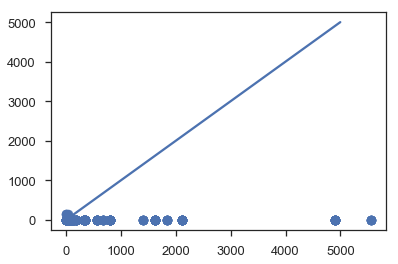

In [136]:
plt.scatter(predictions, actual)
plt.plot(range(5000))

In [120]:
crustal_abundance.fillna(0)[selectedSamples.iloc[0].element][5]*5

0.375

In [116]:
selectedSamples.iloc[0].element

'ag_ppm'

# doing what I did for the USGS data, select them in predicted basins and calculate RMSE

In [16]:
path = r'J:\\Geology\\WSGS\\GIS\\Predicted locations\\'
allFiles=glob.glob(path+"*.shp")

validations = []
for shapefile in allFiles:
    shape = gpd.read_file(shapefile)
    shape = shape.to_crs({'init': 'epsg:3732'})
    chosen = gpd.sjoin(projGeoDF, shape)
    chosen['element'] = shapefile[-10:-4]
    validations.append(chosen)

In [17]:
selectedSamples = pd.concat(validations)
selectedSamples.to_file(driver='ESRI Shapefile', filename='inhouse_samples_clipped.shp')

In [18]:
selectedSamples.head()

,ACRES,AREA,FID_BLM__S,FID_lessth,HOLDAGENCY,Id,NCONTRB_A,Name,OBJECTID,Old_Sample_ID,...,ti_ppm,ti_ppm1,tm_ppm,u_ppm,v_ppm,w_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm
25,1.100868e+06,0.493862,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,600.0,NaN,0.65,12.05,1370.0,4.0,34.2,4.20,550.0,2310.0
51,1.100868e+06,0.493862,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,5000.0,NaN,0.39,6.18,636.0,5.0,23.8,2.62,186.0,755.0
76,1.100868e+06,0.493862,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,500.0,NaN,0.32,6.18,564.0,2.0,21.9,2.25,208.0,474.0
86,6.879538e+05,0.306037,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,900.0,NaN,0.42,29.70,105.0,1.0,20.5,3.65,47.0,417.0
113,6.879538e+05,0.306037,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,800.0,NaN,0.49,5.81,48.0,1.0,29.5,3.29,49.0,331.0


In [19]:
t = gpd.read_file(r'D:\jupyter\inhouse_samples_clipped.shp')
t.columns

Index(['ACRES', 'AREA', 'FID_BLM__S', 'FID_lessth', 'HOLDAGENCY', 'Id',
       'NCONTRB_A', 'Name', 'OBJECTID', 'Old_Sample', 'PERIMETER',
       'Publicatio', 'SMA_ID', 'SURFACE', 'Sample_Des', 'Sample_ID',
       'Shape_Ar_1', 'Shape_Area', 'Shape_Le_1', 'Shape_Leng', 'WY_HU12_',
       'WyoDoG', 'WyoDoG_Nam', 'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm',
       'ba_ppm', 'be_ppm', 'bi_ppm', 'bins_ppm', 'ca_pct', 'cd_ppm',
       'cd_ppm.1', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'element',
       'er_ppm', 'eu_ppm', 'fe_pct', 'ga_ppm', 'gd_ppm', 'ge_ppm', 'gridcode',
       'hf_ppm', 'hg_ppm', 'ho_ppm', 'idx1', 'idx2', 'in_ppm', 'index_righ',
       'k_pct', 'la_ppm', 'latitude', 'li_ppm', 'longitude', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'nd_ppm', 'ni_ppm',
       'p_ppm', 'pb_ppm', 'pd_ppm', 'pr_ppm', 'prob', 'pt_ppm', 'rb_ppm',
       're_ppm', 's_pct', 'sb_ppm', 'sc_ppm', 'se_ppm', 'sm_ppm', 'sn_ppm',
       'sr_ppm', 'ta_ppm', 'tb_ppm', 'te_pp

In [20]:
crustal_abundance=pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\crustal_abundance1.csv',encoding = "ISO-8859-1")
ca = crustal_abundance.set_index('source').T

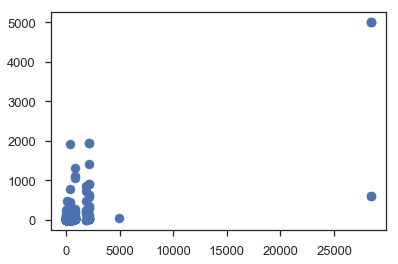

In [21]:
predicted = []
actuals = []
for i in range(len(t)):
    try:
        actuals.append(t.iloc[i][t.iloc[i].element])
        predicted.append(5*ca[ca.index== t.iloc[i].element].mean_ppm.values[0])
    except:
        actuals.append(0)
        predicted.append(0)

flat_preds = np.asarray(predicted)
flat_actual = np.asarray(actuals)
plt.scatter(flat_preds, flat_actual)

In [22]:
t['predicted'] = flat_preds
t['actual'] = flat_actual

In [23]:
t.fillna(0, inplace=True)
t['actual'].replace('None', 0, inplace=True)

In [24]:
from sklearn.metrics import mean_squared_error

rmse = []
for i in range(len(t.element.unique())):
    try:
        rmse.append(np.sqrt(mean_squared_error(t[t['element'] == t.element.unique()[i]].actual, t[t['element'] == 
                                                                                  t.element.unique()[i]].predicted)))
    except:
        rmse.append(np.nan)

In [25]:
from sklearn.metrics import mean_absolute_error

mae = []
for i in range(len(t.element.unique())):
    try:
        mae.append(mean_absolute_error(t[t['element'] == t.element.unique()[i]].actual, t[t['element'] == 
                                                                                  t.element.unique()[i]].predicted))
    except:
        mae.append(np.nan)

In [26]:
mae

[0.24204545454545456,
 40.480810810810794,
 25.61851851851852,
 1618.75,
 11.824696968030304,
 0.10371621743243241,
 0.0,
 20.361219512195124,
 0.2947368434210526,
 0.0,
 0.0,
 113.088,
 712.7837837837837,
 10.952888887333334,
 325.61153846153843,
 25.954567901234565,
 8.903833335,
 25.980000000000008,
 22.94482758775862,
 0.0,
 149.4375,
 84.72711864406779,
 11.649999999999999,
 4898.380952380952,
 8.03263158026316,
 12.54,
 88.1875,
 525.2705882352941,
 52.41666668124999,
 0.0,
 640.8125,
 32.599999998333324,
 7.45,
 1534.1555557222223,
 36.77444444444445,
 25160.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [28]:
deets = pd.DataFrame([mae], columns =t.element.unique() )
deets.to_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\ngdbrock-fUS56\accuracy\inhouse_mae.csv')